# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [3]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
df.drop_duplicates(keep="first",inplace=True)

In [8]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [9]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
numeric_cols = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
# for col in numeric_cols:
#     df[col]=pd.to_numeric(df[col], errors='raise')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

<AxesSubplot:>

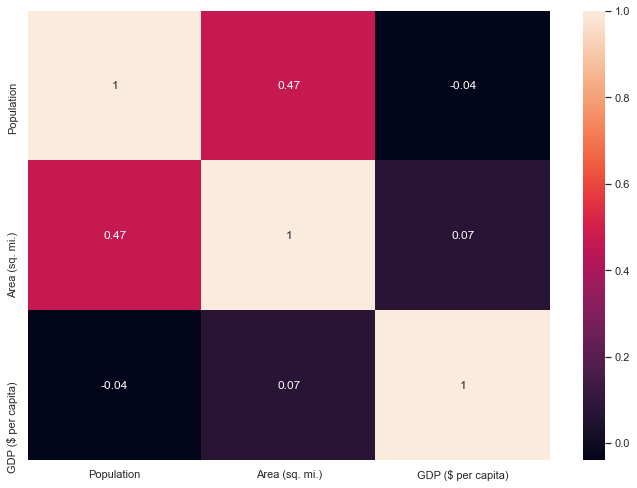

In [12]:
import seaborn as sns
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- most of data colunms are numeric but viewed str with separate ',' <br>
2- there are null values <br>
3- country and region are of type object -> encode <br>

In [13]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [14]:
#solution 
df_copy = df_copy.replace(',','.',regex=True)
for col in numeric_cols:
    df_copy[col]=pd.to_numeric(df_copy[col], errors='raise')


In [15]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [16]:
df_copy.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [17]:
df_copy.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


<AxesSubplot:>

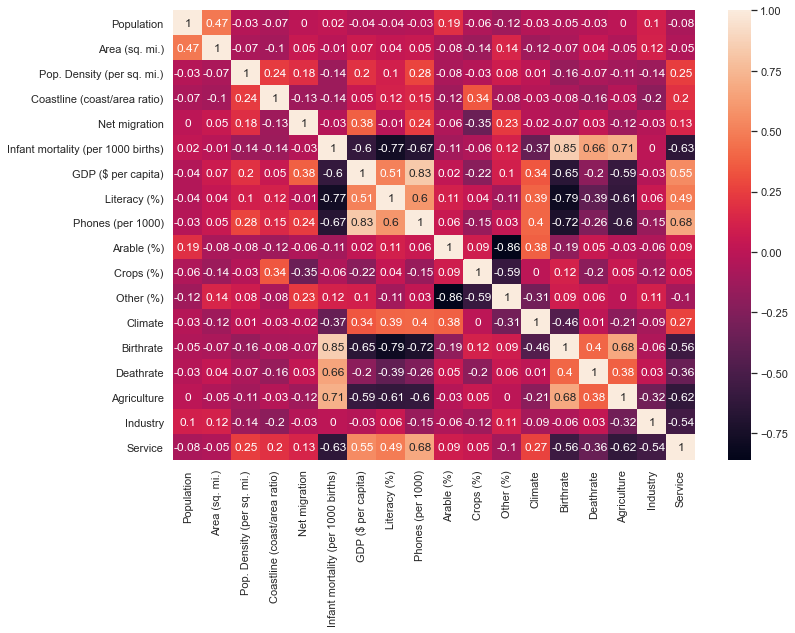

In [18]:
import seaborn as sns
correlation_matrix = df_copy.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

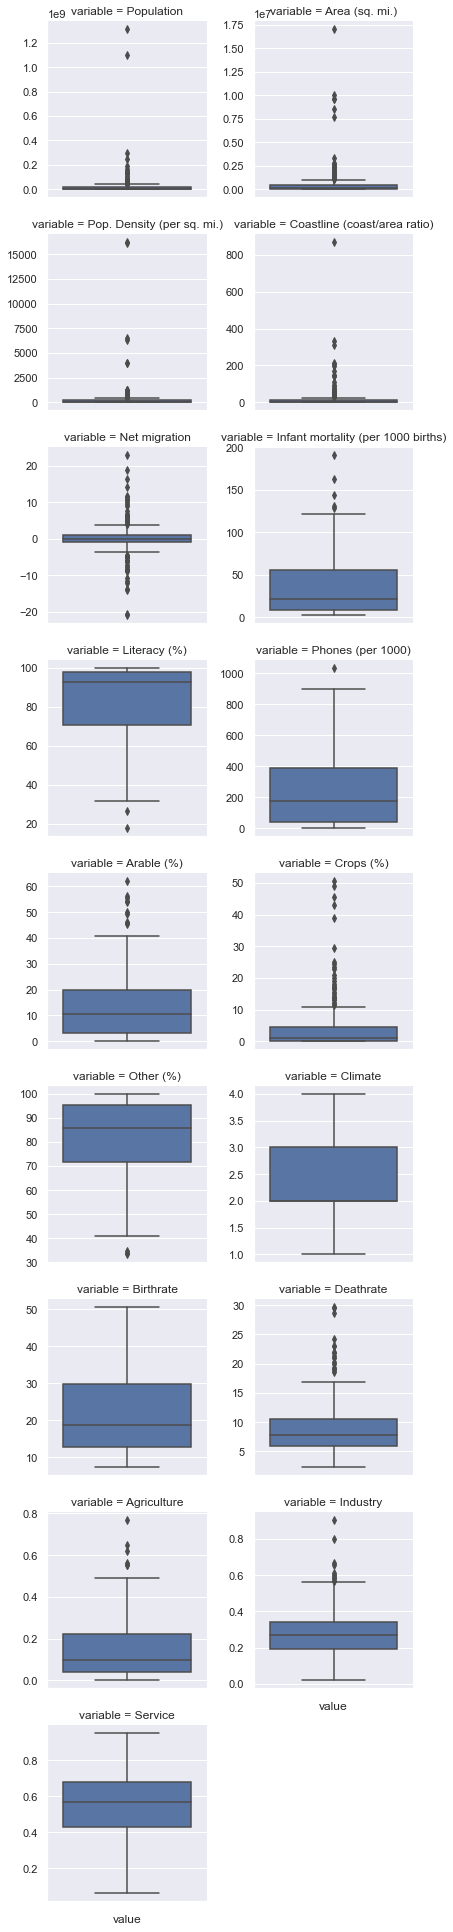

In [19]:
def boxplot(x, **kwargs):
    sns.boxplot(y=x)
    x=plt.xticks(rotation=90)
#create a box plot to show how the output changes with qualitative features
f = pd.melt(df_copy, value_vars=numeric_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=3)
g = g.map(boxplot, "value")

**Second issue**

In [20]:
#solution 
df_copy.drop('Country',axis=1,inplace=True)
df_copy.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [21]:
df_copy.fillna(df_copy.median(), inplace=True)

In [22]:
#test 
df_copy.isnull().sum()

Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [23]:
# remove right spaces from Region column
df_copy['Region'] = df_copy['Region'].str.rstrip()

In [24]:
df_copy['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df_copy['Region'])

LabelEncoder()

In [26]:
df_copy['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'OCEANIA', 'WESTERN EUROPE', 'SUB-SAHARAN AFRICA',
       'LATIN AMER. & CARIB', 'C.W. OF IND. STATES', 'NEAR EAST',
       'NORTHERN AMERICA', 'BALTICS'], dtype=object)

In [27]:
df_copy['Region']=enc.transform(df_copy['Region'])

In [28]:
df_copy['Region'].unique()

array([ 0,  3,  6,  8, 10,  9,  4,  2,  5,  7,  1])

In [29]:
df_copy.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Region                              227 non-null    int32  
 1   Population                          227 non-null    int64  
 2   Area (sq. mi.)                      227 non-null    int64  
 3   Pop. Density (per sq. mi.)          227 non-null    float64
 4   Coastline (coast/area ratio)        227 non-null    float64
 5   Net migration                       227 non-null    float64
 6   Infant mortality (per 1000 births)  227 non-null    float64
 7   GDP ($ per capita)                  227 non-null    float64
 8   Literacy (%)                        227 non-null    float64
 9   Phones (per 1000)                   227 non-null    float64
 10  Arable (%)                          227 non-null    float64
 11  Crops (%)                           227 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [31]:
from sklearn import preprocessing

In [32]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

numeric_cols.append('GDP ($ per capita)')
features = df_copy[numeric_cols]

# take a copy of original data to scale it
df_StdScaled = df_copy.copy()
#StandardScaler
scaler = StandardScaler()
df_StdScaled[numeric_cols] = scaler.fit_transform(features.values)
df_StdScaled.head()



,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0.019695,0.027583,-0.199844,-0.293443,4.750798,3.638098,-0.896394,-2.497817,-1.027491,-0.126361,-0.518861,0.372602,-1.694358,2.212967,2.252507,1.636576,-0.315406,-1.161135
1,3,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.392850,-0.516718,0.151933,-0.726079,0.565115,-0.013604,-0.447933,1.316360,-0.627986,-0.809333,0.595163,-0.706318,0.083424
2,6,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.122886,-0.366846,-0.713827,-0.695494,-0.813978,-0.515252,0.926276,-1.694358,-0.444844,-0.932859,-0.326627,2.390911,-1.673969
3,8,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.741696,-0.167016,0.702871,0.108568,-0.290741,1.259163,-0.416135,-0.188999,0.035113,-1.204213,-0.340700,-0.074844,0.033392
4,10,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.890347,0.932047,0.860282,1.162182,-0.891152,-0.545327,1.004214,1.316360,-1.205379,-0.600755,-0.340700,-0.074844,0.033392


In [33]:
#RobustScaler
df_RbScaled = df_copy.copy()
scaler = RobustScaler()
df_RbScaled[numeric_cols] = scaler.fit_transform(features.values)
df_RbScaled.head()


,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,1.539846,1.283044,-0.191304,-0.071254,12.233422,3.015068,-0.351449,-2.640187,-0.502323,0.102888,-0.190813,0.083889,-4.0,1.631564,2.714441,1.643275,-0.237037,-0.837719
1,3,-0.070652,-0.132335,0.284472,0.051733,-2.615385,0.011036,-0.076087,-0.280374,-0.304878,0.641998,0.798587,-0.482254,4.0,-0.215899,-0.568947,0.777778,-0.622222,0.035088
2,6,1.649640,5.250072,-0.403727,-0.067350,-0.206897,0.212224,0.032609,-1.051402,-0.284843,-0.433213,-0.183746,0.465907,-4.0,-0.096803,-0.701412,0.011696,2.429630,-1.197368
3,8,-0.277207,-0.197640,1.314286,5.618350,-10.986737,-0.248939,0.177536,0.210280,0.241870,-0.025271,3.290931,-0.460314,0.0,0.215312,-0.992400,0.000000,0.000000,0.000000
4,10,-0.276422,-0.197025,0.455280,-0.071254,3.501326,-0.359720,0.974638,0.350467,0.932056,-0.493381,-0.242638,0.519682,4.0,-0.591376,-0.345277,0.000000,0.000000,0.000000


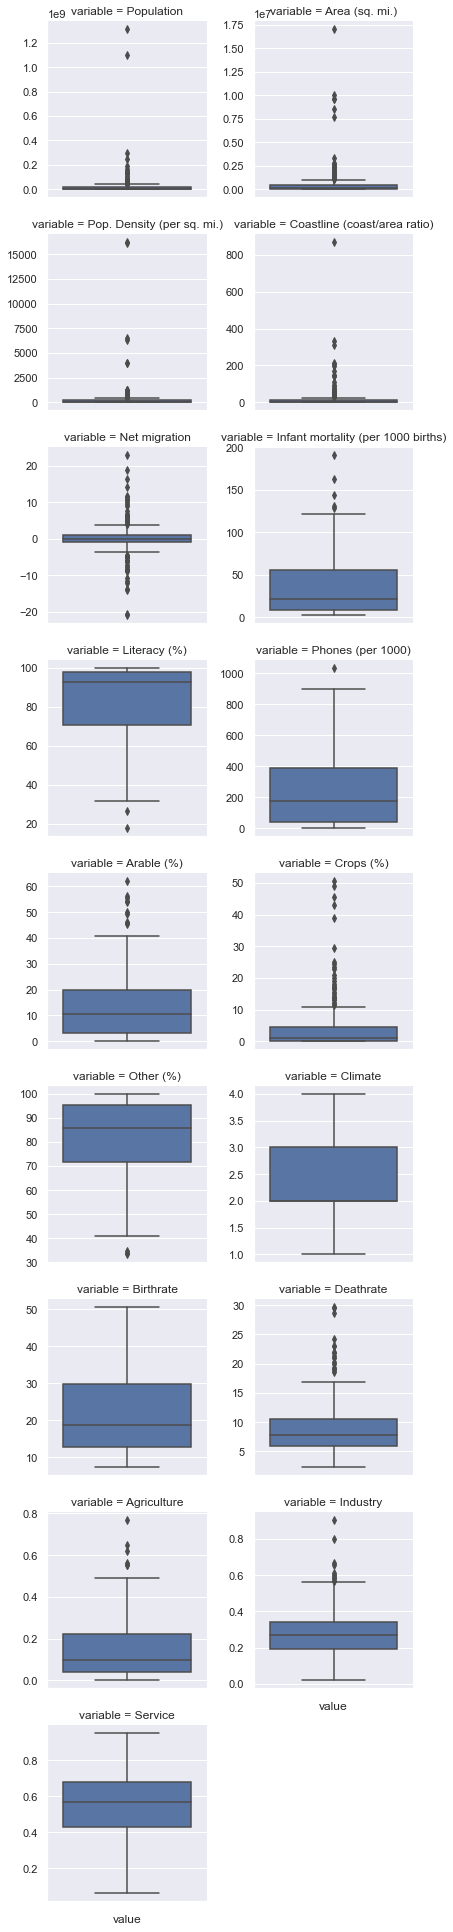

In [34]:
f2 = pd.melt(df_StdScaled, value_vars=df_StdScaled.columns)
g2 = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=3)
g2 = g2.map(boxplot, "value")

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering<br>
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance<br> 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### using standared scaled date

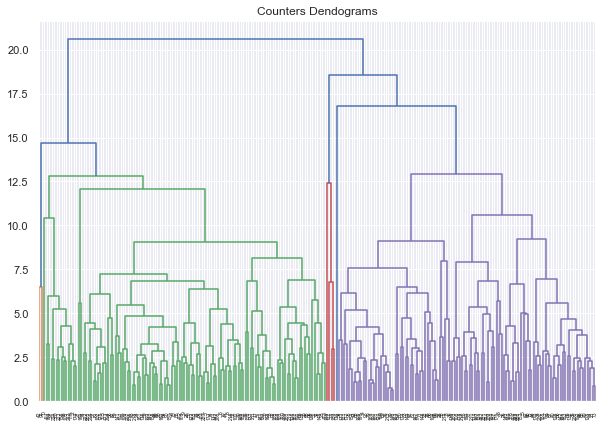

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_StdScaled , method='complete',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

### using Robust scaled date

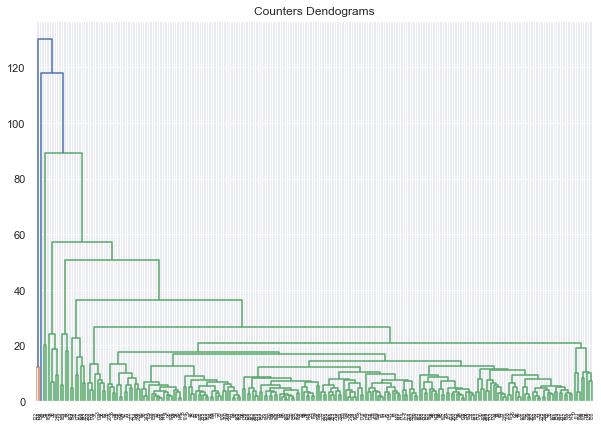

In [36]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_RbScaled , method='complete',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

### it seems like there are 2 or 3 clusters 

### using standared scaled date

In [37]:
#training
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering.fit(df_StdScaled)
preds1=clustering.fit_predict(df_StdScaled, y=None)
print(silhouette_score(df_StdScaled, preds1))

# plt.scatter(np.arange(len(preds)),preds, c=clustering.labels_.astype(float))
# plt.show()


0.30336576148872757


### using Robust scaled date

In [38]:
#training
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering.fit(df_RbScaled)
preds=clustering.fit_predict(df_RbScaled, y=None)
print(silhouette_score(df_RbScaled,preds))

# ggplot(np.arange(len(preds)),preds, c=clustering.labels_.astype(float))
# plt.show()


0.848588879722802


### using standared scaled date

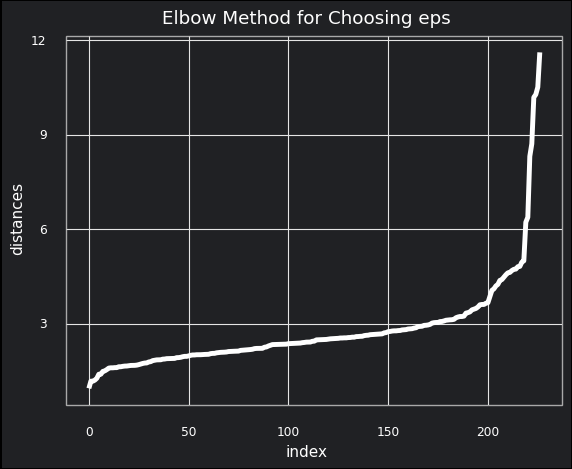

<ggplot: (135928980761)>

In [39]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(df_StdScaled)

distances, neighbors = nn.kneighbors(df_StdScaled)

distances

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

### using Robust scaled date

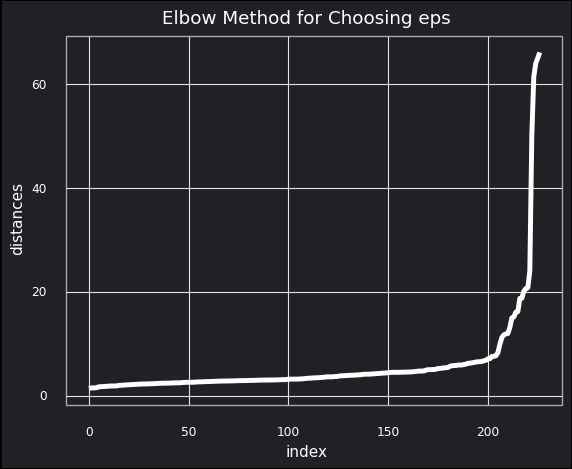

<ggplot: (135928912237)>

In [40]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(df_RbScaled)

distances, neighbors = nn.kneighbors(df_RbScaled)

distances

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

### choose eps = 2.5 for example

### using standared scaled date

In [41]:
dbscan = DBSCAN(eps = 3, min_samples = 5).fit(df_StdScaled)
df_StdScaled['assignments'] = dbscan.labels_
df_clustered = df_StdScaled.loc[(dbscan.labels_ >= 0)]
# clustered = df_copy.columns[:-1]
df_new = df_clustered.drop('assignments',axis=1)
df_full=df_StdScaled.drop('assignments', axis=1)
print(silhouette_score(df_new,df_clustered['assignments'] ))
print(silhouette_score(df_full,df_StdScaled['assignments'] ))
print(sum(dbscan.labels_ == -1))

0.3759007749165457
0.25704864351510404
39


### using Robust scaled date

In [42]:
dbscan = DBSCAN(eps = 3, min_samples = 5).fit(df_RbScaled)
df_RbScaled['assignments'] = dbscan.labels_
df_clustered = df_RbScaled.loc[(dbscan.labels_ >= 0)]
# clustered = df_copy.columns[:-1]
df_new = df_clustered.drop('assignments',axis=1)
df_full=df_RbScaled.drop('assignments', axis=1)
print(silhouette_score(df_new,df_clustered['assignments'] ))
print(silhouette_score(df_full,df_RbScaled['assignments'] ))
print(sum(dbscan.labels_ == -1))

0.33308040932751337
-0.11819512229555343
123


In [43]:
# clustered = df_copy.columns[:-1]
# # clustered = clustered[:-1]
# clustered
df_copy.columns

Index(['Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service'],
      dtype='object')

### using standared scaled date

In [44]:
df_StdScaled.drop('assignments', axis=1)
km = KMeans(3)
km.fit(df_StdScaled)
km_cluster = km.labels_
print(silhouette_score(df_StdScaled,km_cluster))



0.314687194802563


### using Robust scaled date

In [45]:
df_RbScaled.drop('assignments', axis=1)
km = KMeans(3)
km.fit(df_RbScaled)
km_cluster = km.labels_
print(silhouette_score(df_RbScaled,km_cluster))



0.827446907264293


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [46]:
from sklearn.decomposition import PCA
pca_data = df_copy.copy()
pca = PCA(n_components=5, svd_solver='full')
pca_data = pca.fit_transform(pca_data)
# pca_data = pd.DataFrame(pca_data)
# pca_data.head()
pca_data

array([[ 2.31700536e+06,  3.27287156e+04, -8.99434047e+03,
        -1.80109747e+01,  7.73236778e+01],
       [-2.51620534e+07, -3.89879631e+05, -5.00939711e+03,
        -1.17328936e+02,  6.34051316e+01],
       [ 4.20243103e+06,  1.75355705e+06, -4.81056292e+03,
        -8.66543283e+01,  8.41411335e+01],
       ...,
       [-7.28441227e+06, -1.82653749e+04, -8.89250958e+03,
        -3.54141742e+01,  3.51574593e+01],
       [-1.72367331e+07,  2.77428056e+05, -9.11924264e+03,
        -3.84312021e+01,  6.42404227e+01],
       [-1.65045411e+07, -8.98410604e+04, -7.77790131e+03,
        -9.20981167e+01,  6.34527351e+01]])

### dendrogram after pca

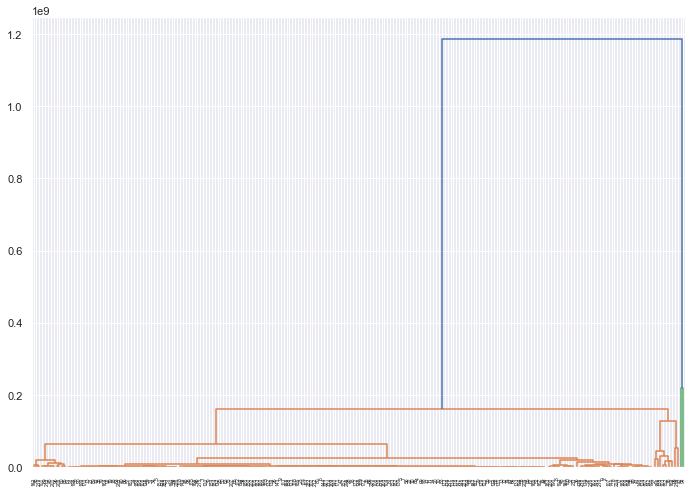

In [47]:
dend2 = shc.dendrogram(shc.linkage(y=pca_data , method='centroid',metric='euclidean'),orientation='top')


### DBSCAN after PCA

### something went wrong here but i don't know it

In [51]:
df_pca = pd.DataFrame(pca_data)
dbscan1 = DBSCAN(eps = 8, min_samples = 10).fit(df_pca)

# print(silhouette_score(pca_data,dbscan1.labels_))
print(np.unique(dbscan1.labels_))
print(sum(dbscan1.labels_ == -1))

[-1]
227


### Kmeans after pca

In [49]:
km1 = KMeans(2)
km1.fit(pca_data)
km_cluster = km1.labels_
print(silhouette_score(pca_data,km_cluster))

km2 = KMeans(3)
km2.fit(pca_data)
km_cluster2 = km2.labels_
print(silhouette_score(pca_data,km_cluster2))

0.9741807474612376
0.8688615716809353


In [54]:
from sklearn.mixture import GaussianMixture
GM = GaussianMixture(n_components=3)
GM.fit(df_RbScaled)
GM.predict_proba(df_RbScaled)

array([[0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000

In [55]:
GM.score_samples(df_RbScaled)

array([-39.87244404, -18.59128304, -21.4541372 , -31.20874619,
       -22.83084978, -42.40223347, -23.1426781 , -19.02995208,
       -16.2906674 , -21.55311243, -18.87007878, -29.10961685,
       -17.08772227, -24.47238224, -18.69880613, -21.97133302,
       -33.22706481, -18.24398052, -23.38425428, -17.26398304,
       -26.17123227, -16.76442908,  41.00128033, -22.67750707,
       -15.65814856, -21.46147197, -34.707773  , -28.04871456,
       -21.78843849, -20.17193553, -18.4209225 , -18.93730726,
       -26.04231783, -20.43271076, -18.42570116, -17.65599721,
       -35.02328513, -23.74927806, -30.12587789, -19.90380817,
       -16.91433448, -19.31769241,  41.00126483, -14.74299264,
       -21.52074122, -20.32484702, -23.40100435, -17.41001128,
       -15.43617529, -17.57624687, -17.07508651, -18.05756817,
       -20.52825425, -18.27872982, -23.66855004, -21.49638044,
       -21.13968662, -14.59925997, -20.44933352, -16.96404462,
       -20.22109336, -15.98795443, -28.90631156, -18.56

In [56]:
GM.score(df_RbScaled)

-18.829832928830875